In [ ]:
import pandas as pd
import numpy as np
import os 
from sklearn import metrics

In [ ]:
ACTIVITIES = {
    0: 'WALKING',
    1: 'WALKING_UPSTAIRS',
    2: 'WALKING_DOWNSTAIRS',
    3: 'SITTING',
    4: 'STANDING',
    5: 'LAYING',
}

def confusion_matrix(Y_true, Y_pred):
    Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_true, axis=1)])
    Y_pred = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_pred, axis=1)])

    return pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])

In [ ]:
SIGNALS = [
    "acc_x",
    "acc_y",
    "acc_z",
    "gyro_x",
    "gyro_y",
    "gyro_z",
]

In [ ]:
DATADIR = '/content/drive/MyDrive/Masters Degree/Machine Learning/Assessment 2/Dataset/MyData'

In [ ]:
pd.read_csv(DATADIR + '/train/X_train/acc_x_train.txt', delim_whitespace=True, header=None)

In [ ]:
pd.read_csv(DATADIR + '/test/y_test.txt', delim_whitespace=True, header=None)

In [ ]:
def _read_csv(filename):
    return pd.read_csv(filename, delim_whitespace=True, header=None)


def load_signals(subset):
    signals_data = []
    
    for signal in SIGNALS:
        filename = DATADIR + '/'+subset+'/X_'+subset+'/'+signal+'_'+subset+'.txt'
        signals_data.append(
            _read_csv(filename).to_numpy()
        ) 
    print(np.array(signals_data).shape)

    return np.transpose(signals_data, (1, 2, 0))

In [ ]:
def load_y(subset):
    
    filename = DATADIR + '/'+subset+'/y_'+subset+'.txt'
    y = _read_csv(filename)[0]

    return pd.get_dummies(y).to_numpy()

In [ ]:
def load_data():
    
    X_train, X_test = load_signals('train'), load_signals('test')
    Y_train, Y_test = load_y('train'), load_y('test')

    return X_train, X_test, Y_train, Y_test

In [ ]:
np.random.seed(42)
import tensorflow as tf
from tensorflow.keras.models import load_model, Model
from tensorflow.python.keras import backend as K
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout
from tensorflow.keras import layers
from tensorflow.keras.layers import InputLayer

In [ ]:
#Counting the number of classes
def _count_classes(y):
    return len(set([tuple(category) for category in y]))

In [ ]:
#Loading All Test & Trainging Data
X_train, X_test, Y_train, Y_test = load_data()

In [ ]:
timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = _count_classes(Y_train)

print(timesteps)
print(input_dim)
print(len(X_train))

In [ ]:
epochs = 10
batch_size = 1
n_hidden = 32

In [ ]:
#Building Model
model = Sequential()
model.add(LSTM(n_hidden, input_shape=(timesteps, input_dim)))
model.add(Dropout(0.2))
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 32)                4992      
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 198       
Total params: 5,190
Trainable params: 5,190
Non-trainable params: 0
_________________________________________________________________


In [ ]:

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:

history = model.fit(X_train,
          Y_train,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          epochs=epochs)

Epoch 1/10
7352/7352 [==============================] - 170s 23ms/step - loss: 0.9552 - accuracy: 0.5866 - val_loss: 0.8458 - val_accuracy: 0.7231
Epoch 2/10
7352/7352 [==============================] - 168s 23ms/step - loss: 0.5666 - accuracy: 0.8153 - val_loss: 0.6331 - val_accuracy: 0.8107
Epoch 3/10
7352/7352 [==============================] - 167s 23ms/step - loss: 0.4511 - accuracy: 0.8674 - val_loss: 0.7531 - val_accuracy: 0.8140
Epoch 4/10
7352/7352 [==============================] - 174s 24ms/step - loss: 0.3893 - accuracy: 0.8923 - val_loss: 0.6438 - val_accuracy: 0.8402
Epoch 5/10
7352/7352 [==============================] - 168s 23ms/step - loss: 0.3062 - accuracy: 0.9113 - val_loss: 0.8059 - val_accuracy: 0.8341
Epoch 6/10
7352/7352 [==============================] - 171s 23ms/step - loss: 0.2889 - accuracy: 0.9172 - val_loss: 0.6343 - val_accuracy: 0.8571
Epoch 7/10
7352/7352 [==============================] - 164s 22ms/step - loss: 0.2793 - accuracy: 0.9221 - val_loss: 0

In [ ]:
# Confusion Matrix
print(confusion_matrix(Y_test, model.predict(X_test)))

Pred                LAYING  SITTING  ...  WALKING_DOWNSTAIRS  WALKING_UPSTAIRS
True                                 ...                                      
LAYING                 528        1  ...                   2                 0
SITTING                  0      300  ...                   2                28
STANDING                 0       40  ...                  12                14
WALKING                  0        0  ...                  86                 7
WALKING_DOWNSTAIRS       0        0  ...                 407                 8
WALKING_UPSTAIRS         0        0  ...                  54               410

[6 rows x 6 columns]
<function confusion_matrix at 0x7fa77cf989d8>


In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
import matplotlib.pyplot as plt

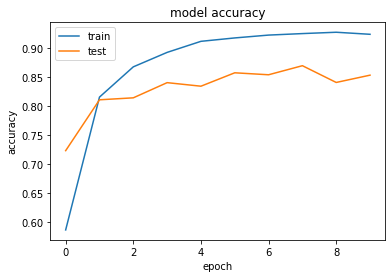

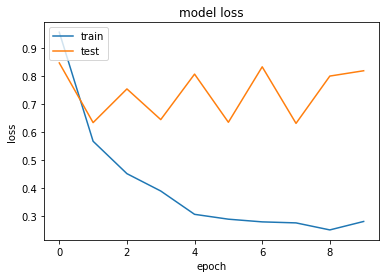

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

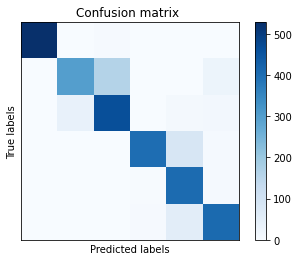

In [ ]:
cm = confusion_matrix(Y_test, model.predict(X_test))

plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()

In [ ]:
score = model.evaluate(X_test, Y_test) 

print(score)

93/93 [==============================] - 1s 11ms/step - loss: 0.8179 - accuracy: 0.8531
[0.8179272413253784, 0.8530709147453308]
